# Dog Breed Classification using fastai

This project focuses on building an image classification model that can identify the breed of a dog from an image.


## 1. Problem Definition

### Goal
The goal of this project is to train an image classification model that can automatically recognize the breed of a dog based on an input image.

### Classes
The model classifies images into the following dog breeds:
- Border Collie
- Boxer
- Cocker Spaniel
- German Shepherd
- Malinois
- Poodle

### Use Case
Such a model can be useful for:
- Pet-related mobile apps
- Assisting shelters or veterinary systems in identifying dog breeds

### Expected Challenges

- Images may vary in angle, and background
- Some dog breeds have similar visual features
- The age of the dog may affect the dog’s external appearance
- The size of the dog and body proportions may vary even within the same breed


## 2. Dataset Creation and Preparation

### Image Collection

This project uses images from the Stanford Dogs Dataset, which contains dog breed images collected from ImageNet for fine-grained image categorization.
The full dataset includes 120 dog breeds and 20,580 images, along with annotations such as class labels and bounding boxes.

**Official dataset page:** http://vision.stanford.edu/aditya86/ImageNetDogs/

In this project, I used a subset of breeds in order to train and evaluate a multi-class classifier on a smaller, controlled set of classes.


### Data Cleaning and Filtering

The dataset was manually reviewed to remove:
- Images that did not clearly show a dog
- Images with multiple dogs
- Low-quality or blurry images

Basic filtering was applied to ensure that each image clearly represents a single dog of the target breed.

### Final Dataset Structure

The final dataset is organized in a folder-based structure, where each folder name represents the class label.



In [1]:
from pathlib import Path

DATA_PATH = Path("data/dogs")

# List all breed folders
[p.name for p in DATA_PATH.iterdir() if p.is_dir()]


['border collie',
 'boxer',
 'cocker_spinel',
 'german shaperd',
 'malinois',
 'poodle']

## 3. Data Loading in fastai


In [2]:
from fastai.vision.all import *
from pathlib import Path

DATA_PATH = Path("data/dogs")
DATA_PATH


Path('data/dogs')

In [3]:
dog_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)

dls = dog_datablock.dataloaders(DATA_PATH, bs=32)


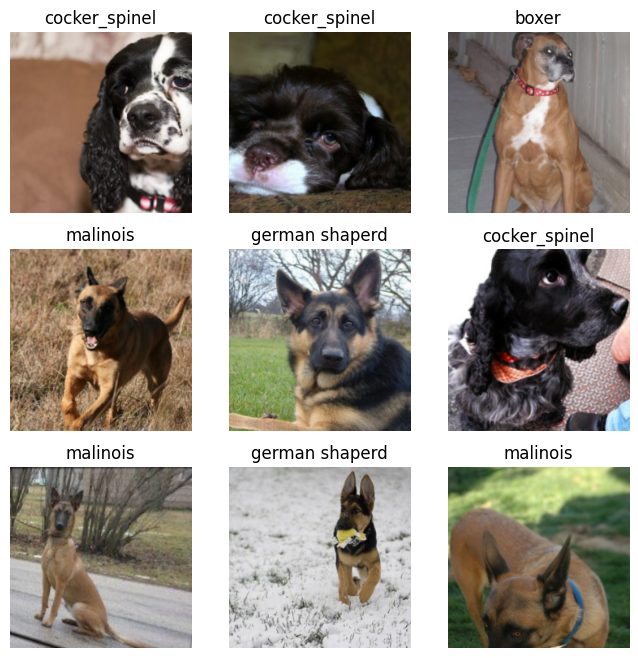

In [4]:
dls.show_batch(max_n=9, figsize=(8,8))

## 4. Model Training


In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr = 5.75e-4
learn.fine_tune(4, base_lr=lr)


epoch,train_loss,valid_loss,error_rate,time
0,2.294470,0.454331,0.158333,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.938295,0.220359,0.066667,01:18
1,0.661904,0.103272,0.041667,01:18
2,0.473100,0.097575,0.033333,01:22
3,0.393143,0.093993,0.025000,04:08


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

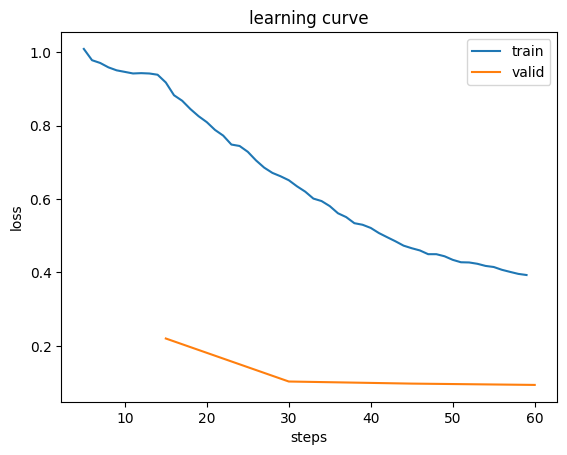

In [6]:
learn.recorder.plot_loss()


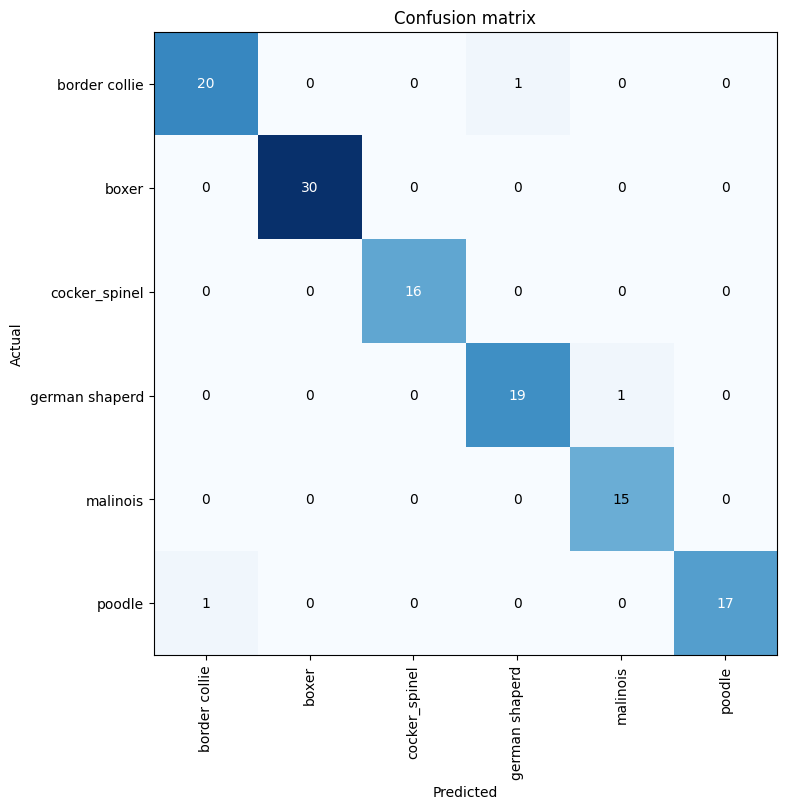

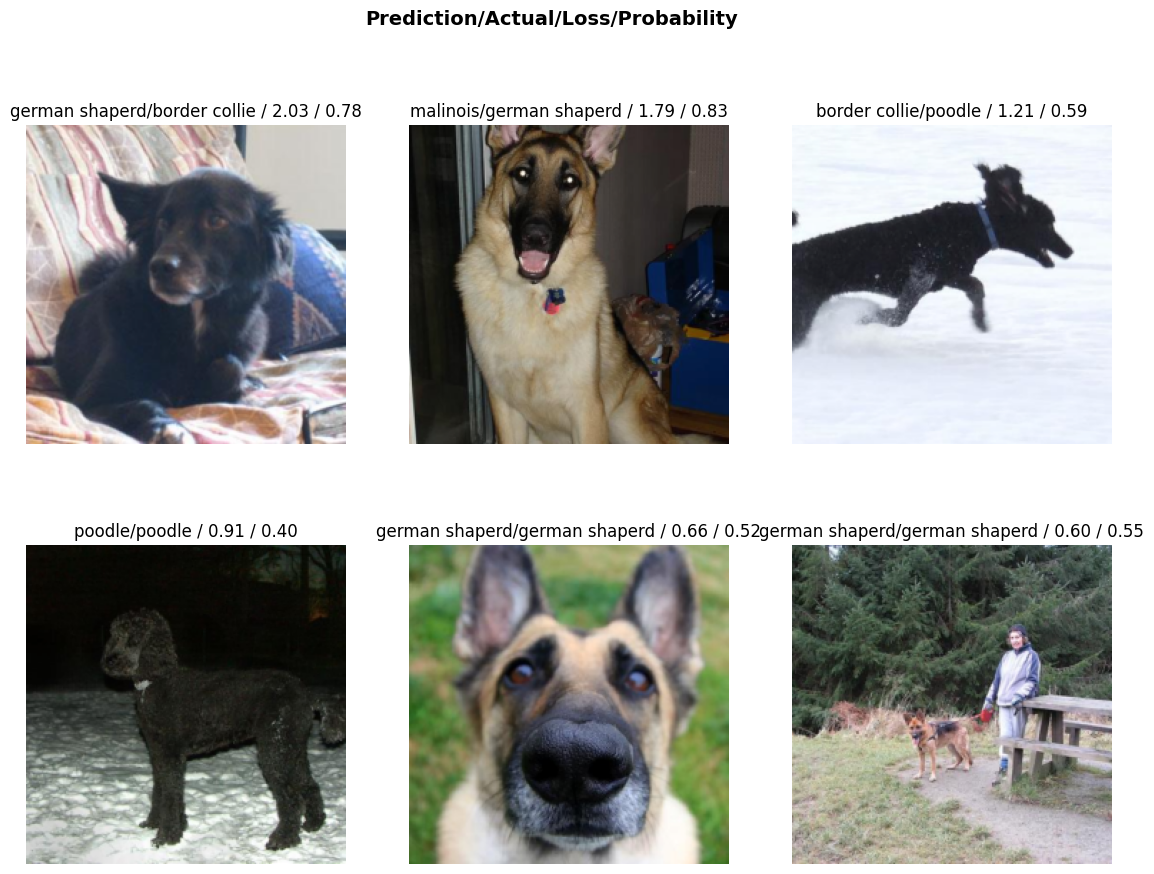

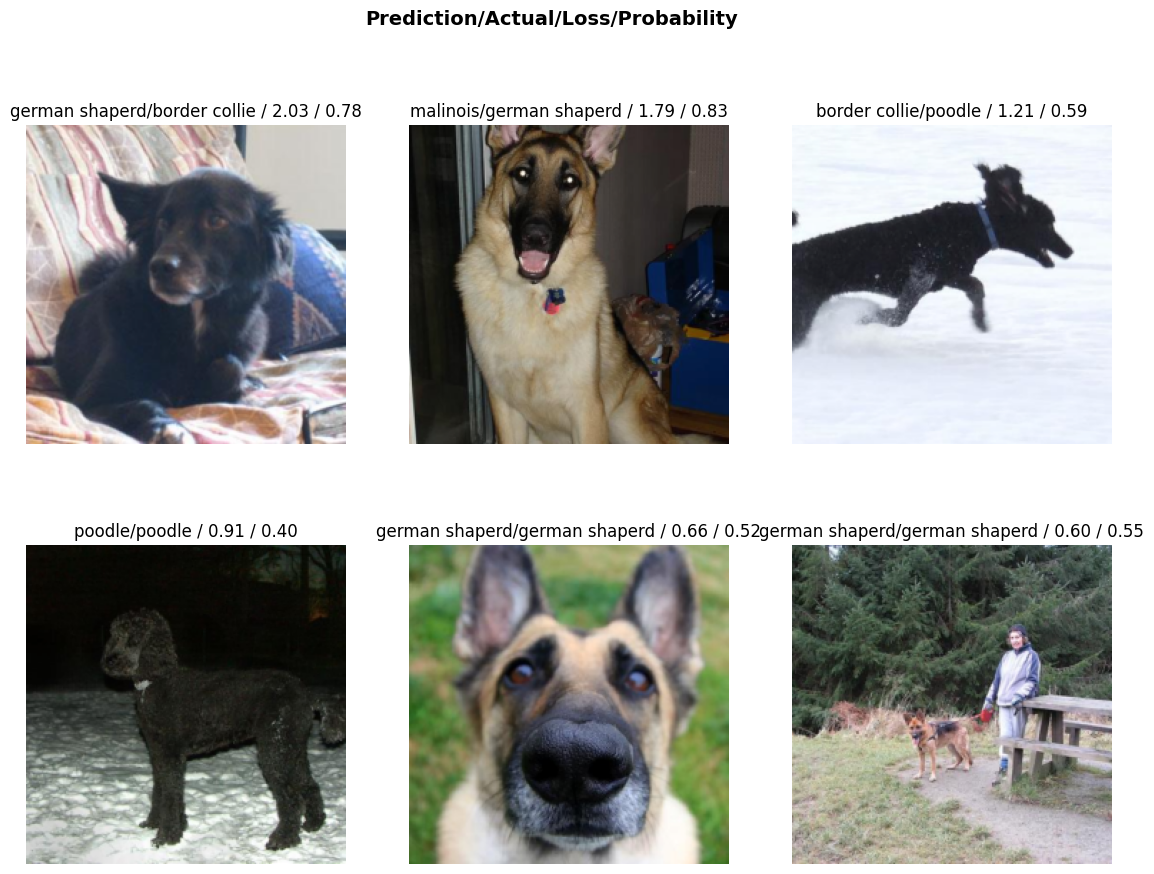

In [7]:
learn.validate()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8))


interp.plot_top_losses(6, figsize=(14,10))


interp.plot_top_losses(6, largest=True, figsize=(14,10))


### Discussion of Model Weaknesses

Despite strong overall performance, the model shows limitations when distinguishing between visually similar dog breeds.

Most misclassifications occurred between visually similar breeds, particularly German Shepherd and Malinois.

Factors such as dog age (puppy vs. adult), body size variation, pose, and background clutter can negatively affect predictions.

Additionally, some images contain partial views or dynamic motion, which may obscure key breed-specific features.
Future improvements could include training on a larger and more balanced dataset, using bounding box annotations, or experimenting with deeper architectures or ensemble models.
